In [51]:
import sys

sys.path.append(".../src")
sys.path.append(".../Bayer")
sys.path.append(".../Fuji")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import numpy as np
from scipy import ndimage
from skimage import io
from skimage import transform
from src.demosaicing import demosaic_bayer


(400, 600, 3)

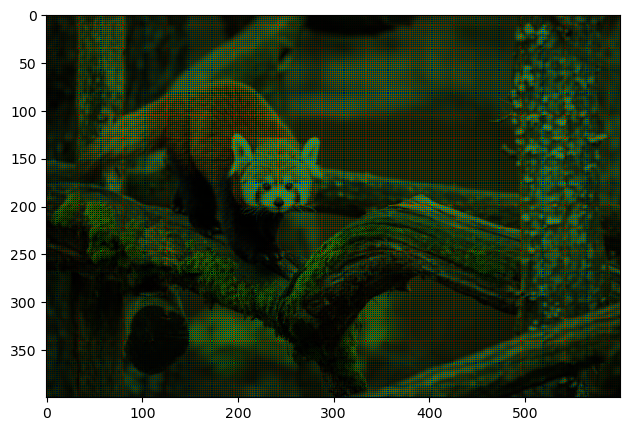

In [53]:
image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Bayer\\pandas.npy")
io.imshow(image)
image.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


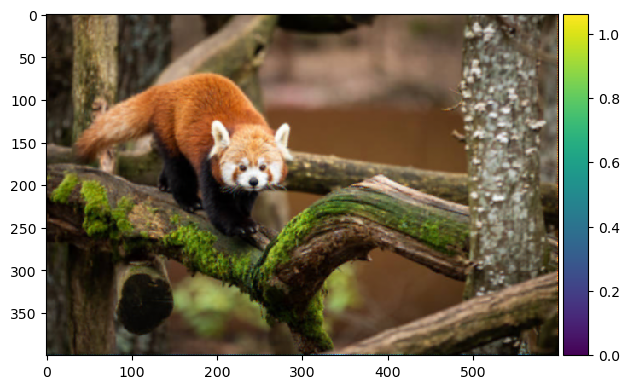

In [55]:
demo_image = demosaic_bayer(image)
io.imshow(demo_image)

(360, 600, 3)

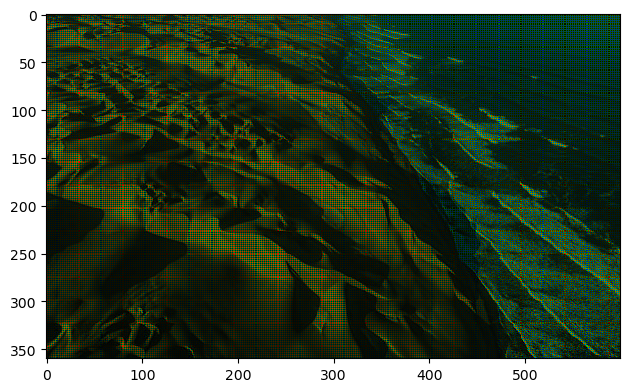

In [56]:
image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Bayer\\namib.npy")
io.imshow(image)
image.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


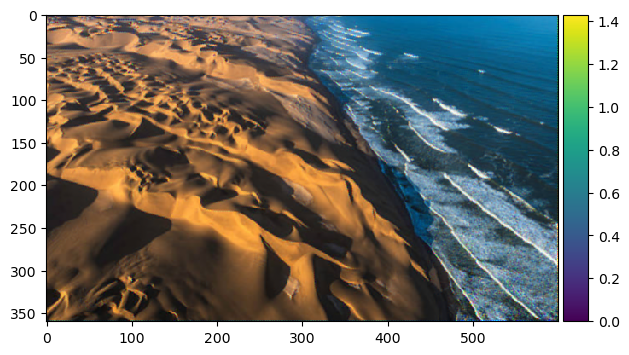

In [57]:
demo_image = demosaic_bayer(image)
io.imshow(demo_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


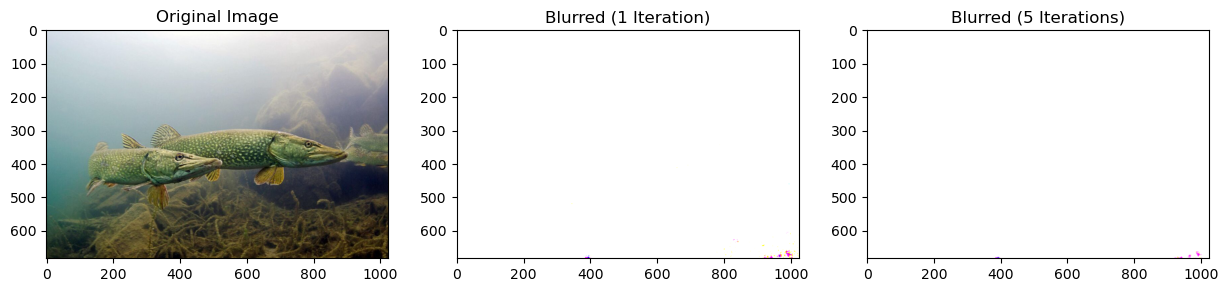

In [ ]:
import torch
import torch.nn.functional as F
from numpy.typing import NDArray
from skimage import io


def Gauss_blur_RGB(image: NDArray, iterations: int ) -> NDArray:
    """
    Apply a Gaussian blur to an RGB image with adjustable blur strength by repeated application.
    
    Args:
        image (NDArray): Input RGB image with shape (height, width, 3).
        iterations (int): Number of times the Gaussian blur is applied. More iterations = stronger blur.
    
    Returns:
        NDArray: Blurred RGB image.
    """
    if image.ndim != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a 3D RGB image with shape (height, width, 3).")
    image = image.astype(np.float32) / 255.0 
    # Convert image to tensor
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Predefined 3x3 Gaussian kernel
    Gauss_blur_kernel = torch.tensor([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ], dtype=torch.float32) / 16.0
    
    # Expand kernel for RGB channels
    kernel = Gauss_blur_kernel.expand(3, 1, 3, 3)
    
    # Apply Gaussian blur multiple times
    for _ in range(iterations):
        image_tensor = F.conv2d(image_tensor, kernel, stride=1, padding=1, groups=3)
    
    # Convert back to NumPy array
    return image_tensor.squeeze(0).permute(1, 2, 0).numpy()

import matplotlib.pyplot as plt
import numpy as np

# Example image (replace with an actual image for real testing)
image = io.imread("szczupak.jpg")  # Example RGB image

# Apply Gaussian blur with different strengths
blurred_image_1 = Gauss_blur_RGB(image, iterations=1)  # Mild blur
blurred_image_5 = Gauss_blur_RGB(image, iterations=5)  # Stronger blur

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title("Blurred (1 Iteration)")
plt.imshow(blurred_image_1)

plt.subplot(1, 3, 3)
plt.title("Blurred (5 Iterations)")
plt.imshow(blurred_image_5)
plt.show()
